In [1]:
import palantir
import scanpy as sc
import pandas as pd
import os

# Plotting
import matplotlib
import matplotlib.pyplot as plt

# warnings
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)

# Inline plotting
%matplotlib inline

In [2]:
ad = sc.read_h5ad("/home/mhassan/R_Projects/scAtlas/Analysis/ActivatedECs/Analysis/Pseudotime_InHouse_cytotrace.h5ad")
ad

AnnData object with n_obs × n_vars = 17353 × 47372
    obs: 'barcode', 'BC_Seq', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'BMI', 'Age', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'Activated.ECs_signature', 'Vascular_labels', 'transferred_labels_from_Act', 'ident', 'Size_Factor', 'monocle3_clusters', 'monocle3_partitions', 'monocle3_pseudotime', 'CytoTRACE2_Score', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'cell_bc'
    var: 'name'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

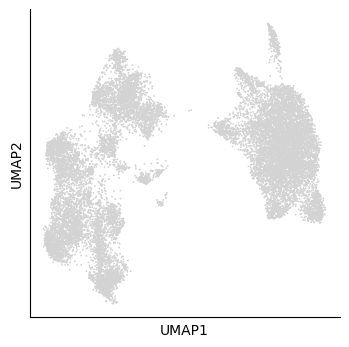

In [3]:
sc.pl.umap(ad)

In [4]:
sc.pp.normalize_per_cell(ad)
palantir.preprocess.log_transform(ad)

In [5]:
sc.pp.highly_variable_genes(ad, n_top_genes=2000)

In [6]:
sc.pp.pca(ad)

# Diffusion maps

In [7]:
dm_res = palantir.utils.run_diffusion_maps(ad)

In [8]:
ms_data = palantir.utils.determine_multiscale_space(ad)

# Visualization

In [9]:
sc.pp.neighbors(ad)
sc.tl.umap(ad)

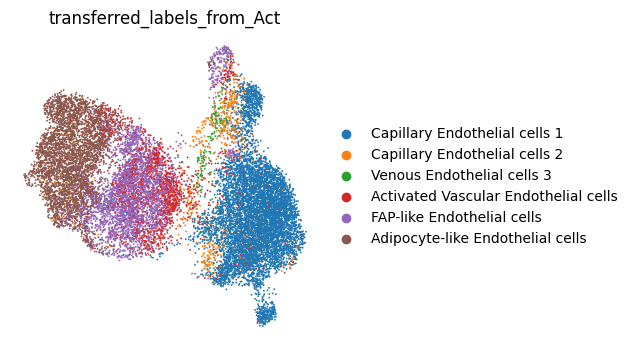

In [10]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    ad, color= 'transferred_labels_from_Act',
    basis="umap",
    frameon=False,
)

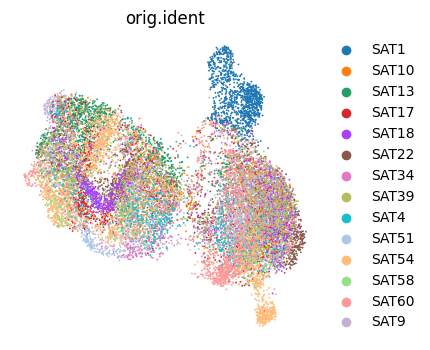

In [11]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    ad, color= 'orig.ident',
    basis="umap",
    frameon=False,
)

# Batch correction

In [12]:
sc.external.pp.harmony_integrate(ad, key="samples")

2025-01-22 12:35:22,879 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-01-22 12:35:26,876 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-01-22 12:35:26,993 - harmonypy - INFO - Iteration 1 of 10
2025-01-22 12:35:32,577 - harmonypy - INFO - Iteration 2 of 10
2025-01-22 12:35:38,193 - harmonypy - INFO - Iteration 3 of 10
2025-01-22 12:35:43,741 - harmonypy - INFO - Iteration 4 of 10
2025-01-22 12:35:48,051 - harmonypy - INFO - Iteration 5 of 10
2025-01-22 12:35:51,303 - harmonypy - INFO - Converged after 5 iterations


In [13]:
ad.obsm['X_pca'] = ad.obsm['X_pca_harmony']
sc.pp.neighbors(ad, n_neighbors=10, n_pcs=30)
sc.tl.umap(ad)
sc.tl.leiden(ad, resolution=0.5)

/tmp/ipykernel_1855201/2015361874.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(ad, resolution=0.5)


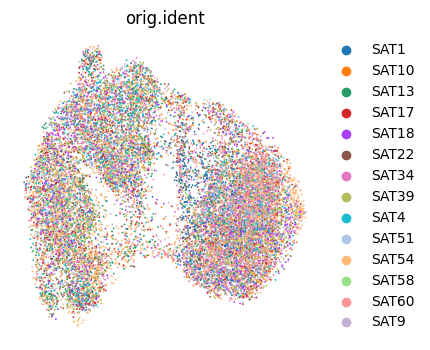

In [14]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    ad, color= 'orig.ident',
    basis="umap",
    frameon=False,
)

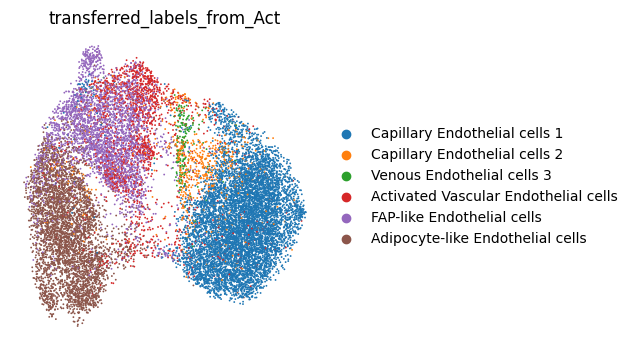

In [15]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    ad, color= 'transferred_labels_from_Act',
    basis="umap",
    frameon=False,
)

# MAGIC imputation

MAGIC is an imputation technique developed in the Pe'er lab for single cell data imputation. 
Palantir uses MAGIC to impute the data for visualization and determining gene expression trends.

In [16]:
imputed_X = palantir.utils.run_magic_imputation(ad)

In [17]:
ad

AnnData object with n_obs × n_vars = 17353 × 47372
    obs: 'barcode', 'BC_Seq', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'BMI', 'Age', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'Activated.ECs_signature', 'Vascular_labels', 'transferred_labels_from_Act', 'ident', 'Size_Factor', 'monocle3_clusters', 'monocle3_partitions', 'monocle3_pseudotime', 'CytoTRACE2_Score', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'cell_bc', 'n_counts', 'leiden'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca

In [18]:
for col in ad.obs.select_dtypes(['category']).columns:
    ad.obs[col] = ad.obs[col].cat.remove_unused_categories()

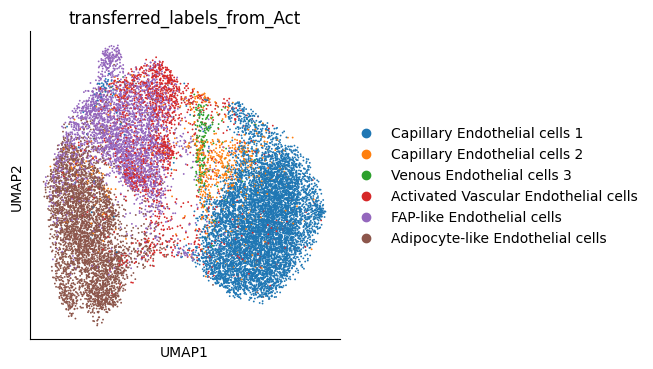

In [19]:
sc.pl.embedding(
    ad,
    basis="umap",
    layer="MAGIC_imputed_data",
    color="transferred_labels_from_Act"
)
plt.show()

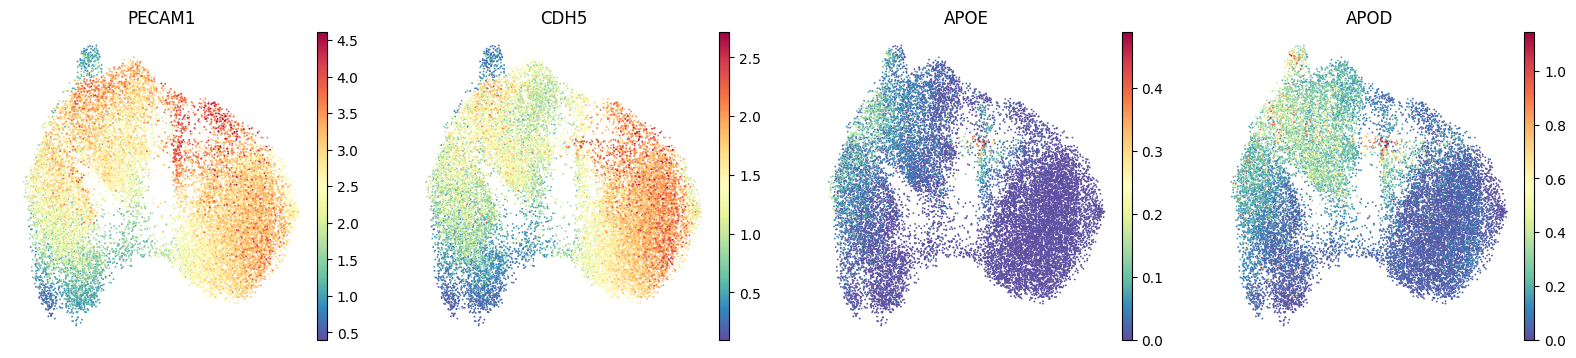

In [20]:
sc.pl.embedding(
    ad,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=["PECAM1", "CDH5", "APOE", "APOD"],
    frameon=False,
)
plt.show()

# Diffusion maps visualization

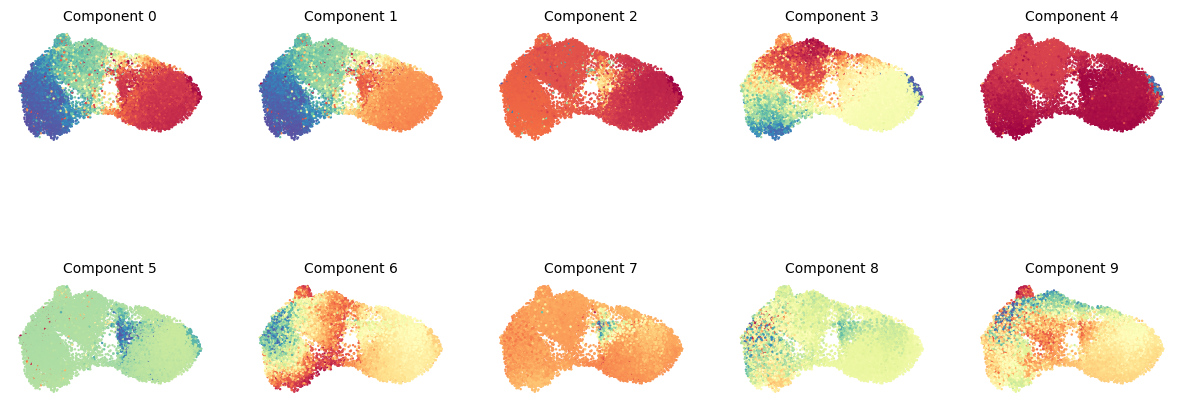

In [21]:
palantir.plot.plot_diffusion_components(ad)
plt.show()

# Running palantir

Palantir can automatically determine the terminal states as well. 

The start cell for this dataset was chosen based on high expression of CD31 and CDH5

In [22]:
palantir.utils.find_terminal_states(ad, 
                                    celltypes=["Venous Endothelial cells 3", 
                                               "Capillary Endothelial cells 1",
                                               "Capillary Endothelial cells 2",
                                              "Activated Vascular Endothelial cells",
                                              "FAP-like Endothelial cells",
                                              "Adipocyte-like Endothelial cells"], 
                                    celltype_column="transferred_labels_from_Act")

Using SAT54:GTAGAGGCAATACCTGx for cell type Capillary Endothelial cells 1 which is max in diffusion component 1.
Using SAT1:GTAACCAAGGCTCTCGx for cell type FAP-like Endothelial cells which is max in diffusion component 0.
Using SAT54:GATTCTTCAACCGCTGx for cell type Adipocyte-like Endothelial cells which is min in diffusion component 0.


/home/mhassan/miniconda3/envs/palantir/lib/python3.12/site-packages/palantir/utils.py:859: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ad.obs[celltype_column][ec] == celltype:
/home/mhassan/miniconda3/envs/palantir/lib/python3.12/site-packages/palantir/utils.py:862: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ad.obs[celltype_column][ec] == celltype:
/home/mhassan/miniconda3/envs/palantir/lib/python3.12/site-packages/palantir/utils.py:975: UserWarning: No valid component found: Venous Endothelial cells 3 Consider increasing the number of diffusion components ('n_components' in palantir.utils.run_diffusion_ma

SAT54:GTAGAGGCAATACCTGx       Capillary Endothelial cells 1
SAT1:GTAACCAAGGCTCTCGx           FAP-like Endothelial cells
SAT54:GATTCTTCAACCGCTGx    Adipocyte-like Endothelial cells
dtype: object

In [23]:
terminal_states = pd.Series(
    ["Adipocyte-like Endothelial cells", "FAP-like Endothelial cells", "Capillary Endothelial cells 1"],
    index=["SAT54:GATTCTTCAACCGCTGx", "SAT1:GTAACCAAGGCTCTCGx", "SAT54:GTAGAGGCAATACCTGx"],
)

In [24]:
pr_res = palantir.core.run_palantir(
    ad, num_waypoints=500, 
    early_cell= ['SAT54:GTAGAGGCAATACCTGx'],
    terminal_states=terminal_states
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.02500843604405721 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.3724834163983663 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


# Visualizing Palantir results

In [25]:
ad

AnnData object with n_obs × n_vars = 17353 × 47372
    obs: 'barcode', 'BC_Seq', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'BMI', 'Age', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'Activated.ECs_signature', 'Vascular_labels', 'transferred_labels_from_Act', 'ident', 'Size_Factor', 'monocle3_clusters', 'monocle3_partitions', 'monocle3_pseudotime', 'CytoTRACE2_Score', 'CytoTRACE2_Relative', 'preKNN_CytoTRACE2_Score', 'preKNN_CytoTRACE2_Potency', 'cell_bc', 'n_counts', 'leiden', 'palantir_pseudotime', 'palantir_entropy'
    var: 'name', 'highly_variable', 'means', 'dispersion

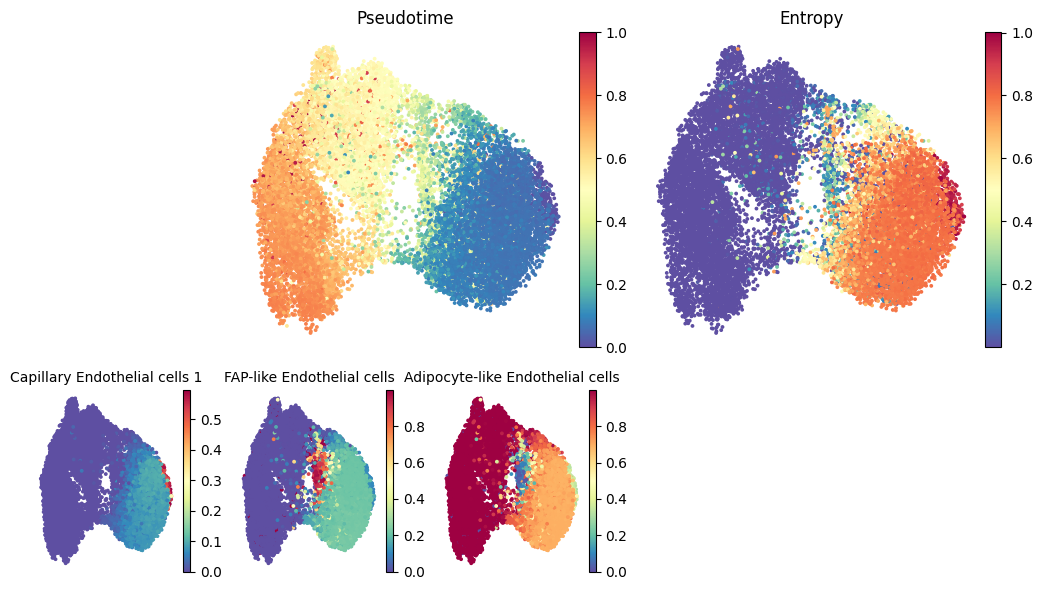

In [26]:
palantir.plot.plot_palantir_results(ad, s=3)
plt.show()

In [31]:
# Plot the Palantir results
palantir.plot.plot_palantir_results(ad, s=3)

# Force Matplotlib to complete drawing the plot
plt.draw()

# Save the plot as a high-quality PDF
plt.savefig('/home/mhassan/R_Projects/scAtlas/Revision/Palantir/InHouse_pseudotime/Palantir_results.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

#8b0000

In [27]:
ad.write_h5ad('Palantir_from_InHouse_monocle3pseudotime_harmonyInt.h5ad')

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import palantir

# Define a custom colormap: gray to red4
colors = ["#bebebe", "#8b0000"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Plot the Palantir results with the custom colormap
palantir.plot.plot_palantir_results(ad, s=3, cmap=custom_cmap)

# Ensure the plot is fully rendered
plt.draw()

# Save the plot with the updated color scheme
plt.savefig('/home/mhassan/R_Projects/scAtlas/Revision/Palantir/InHouse_pseudotime/Palantir_results_colored.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)
